## Monthly Plots Generator (Bar + Line)

/tmp/ipykernel_1771598/2709072904.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_fake = df_fake[df_fake['starred_at'].dt.to_period('M') <= cutoff_date]
/tmp/ipykernel_1771598/2709072904.py:30: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  group['year_month'] = group['starred_at'].dt.to_period('M')
/tmp/ipykernel_1771598/2709072904.py:33: UserWarning: Converting to Period representation will drop timezone information.
  min_date = group["starred_at"].min().to_period('M')
/tmp/ipykernel_1771598/2709072904.py:34: UserWarning: Converting to Period representation will drop timezone information.
  max_date = group["starred_at"].max().to_period('M')
/tmp/ipykernel_1771598/2709072904.py:30: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  group['year_month'] = group['starred_at'].dt.to_period('M')
/tmp/ipykernel_1771598/2709072904.py:33: UserWarn

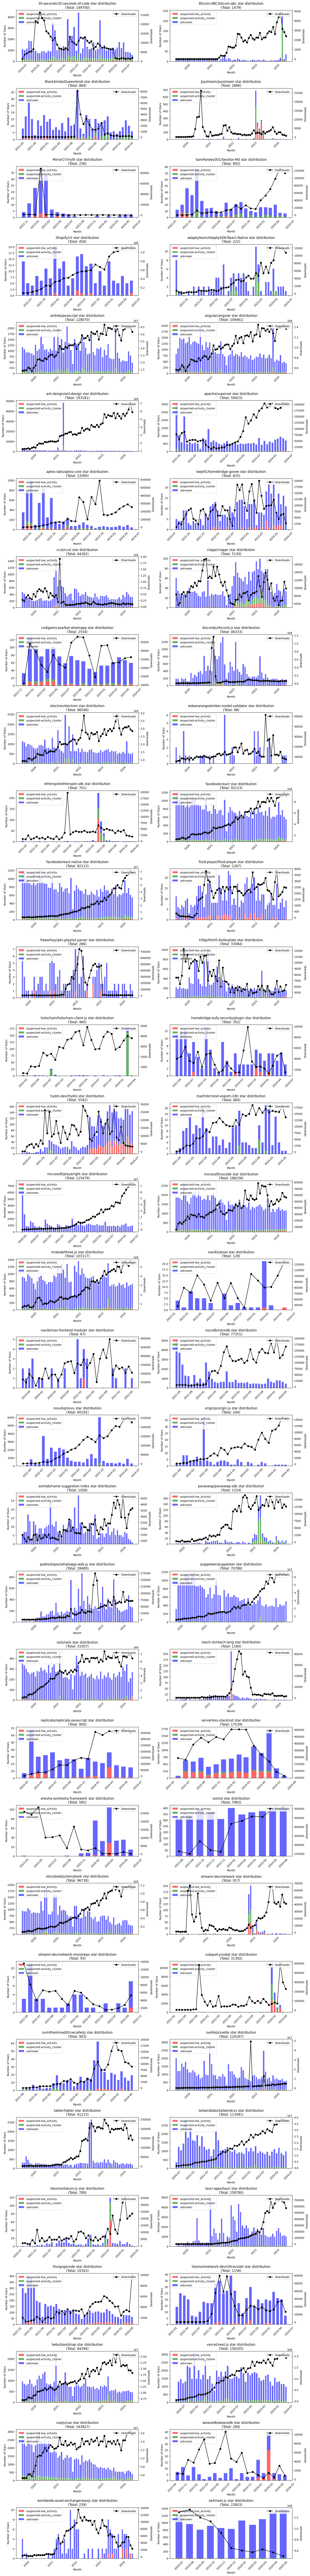

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df_fake = pd.read_csv('data/fake_stars_complex_users.csv')
df_downloads = pd.read_csv('data/filtered_repos_downloads.csv')
df_fake['starred_at'] = pd.to_datetime(df_fake['starred_at'], utc=True)
df_downloads['month'] = pd.to_datetime(df_downloads['month']).dt.to_period('M')

cutoff_date = pd.Period('2024-06', freq='M')
df_fake = df_fake[df_fake['starred_at'].dt.to_period('M') <= cutoff_date]
df_downloads = df_downloads[df_downloads['month'] <= cutoff_date]

fake_grouped = df_fake.groupby("repo_name")

num_repos = len(fake_grouped)

rows = (num_repos // 2) + (num_repos % 2)
cols = 2

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))
axes = axes.flatten()

# Colors for different types of fake_acct
colors = {'suspected-low_activity': 'red', 'suspected-activity_cluster': 'green', 'unknown': 'blue'}

# Iterate over each group and plot on the respective subplot
for ax, (github, group) in zip(axes, fake_grouped):
    # Extract month and year from 'starred_at' field
    group['year_month'] = group['starred_at'].dt.to_period('M')

    # Determine the overall date range
    min_date = group["starred_at"].min().to_period('M')
    max_date = group["starred_at"].max().to_period('M')
    all_months = pd.period_range(start=min_date, end=max_date, freq='M')

    # Initialize a DataFrame to hold the counts for each fake_acct type
    stacked_counts = pd.DataFrame(index=all_months)

    # Populate the DataFrame with counts for each fake_acct type
    for fake_type in colors.keys():
        type_group = group[group['fake_acct'] == fake_type]
        monthly_counts = type_group['year_month'].value_counts().sort_index()
        stacked_counts[fake_type] = monthly_counts.reindex(all_months, fill_value=0)

    # Plot the stacked bar chart
    bottom = None
    for fake_type, color in colors.items():
        ax.bar(stacked_counts.index.to_timestamp(), stacked_counts[fake_type], bottom=bottom, color=color, alpha=0.6, width=20, label=fake_type)
        if bottom is None:
            bottom = stacked_counts[fake_type]
        else:
            bottom += stacked_counts[fake_type]
    # Merge with download data
    repo_downloads = df_downloads[df_downloads['github'] == github].set_index('month')['downloads']
    repo_downloads = repo_downloads.reindex(all_months, fill_value=0)

    # Plot downloads as a line chart
    ax2 = ax.twinx()
    ax2.plot(repo_downloads.index.to_timestamp(), repo_downloads, color='black', linestyle='-', marker='o', label='Downloads')
    # Calculate total stars
    total_stars = stacked_counts.sum().sum()

    # Update title to include total stars
    ax.set_title(f'{github} star distribution\n(Total: {total_stars})')

    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Stars')
    ax2.set_ylabel('Downloads')
    ax.tick_params(axis='x', rotation=45)
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Monthly Plots Generator (Line)

/tmp/ipykernel_1771598/574931196.py:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_fake = df_fake[df_fake['starred_at'].dt.to_period('M') <= cutoff_date]
/tmp/ipykernel_1771598/574931196.py:31: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  group['year_month'] = group['starred_at'].dt.to_period('M')
/tmp/ipykernel_1771598/574931196.py:34: UserWarning: Converting to Period representation will drop timezone information.
  min_date = group["starred_at"].min().to_period('M')
/tmp/ipykernel_1771598/574931196.py:35: UserWarning: Converting to Period representation will drop timezone information.
  max_date = group["starred_at"].max().to_period('M')
/tmp/ipykernel_1771598/574931196.py:31: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  group['year_month'] = group['starred_at'].dt.to_period('M')
/tmp/ipykernel_1771598/574931196.py:34: UserWarning: C

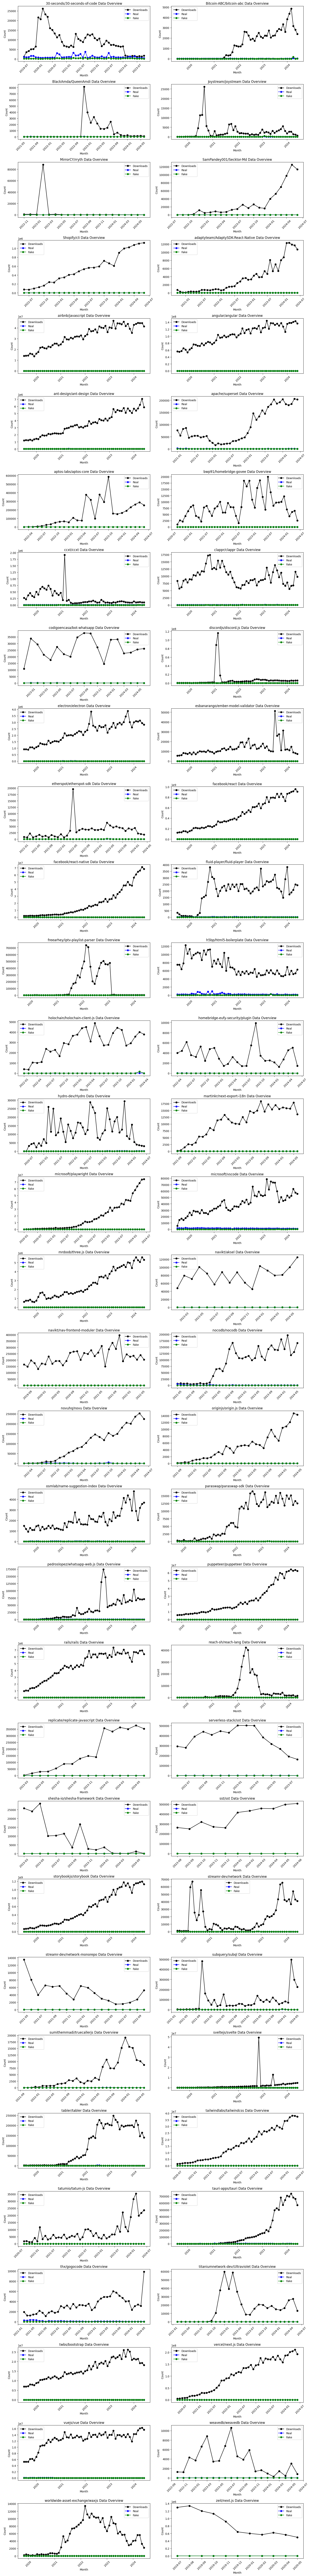

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df_fake = pd.read_csv('data/fake_stars_complex_users.csv')
df_downloads = pd.read_csv('data/filtered_repos_downloads.csv')
df_fake['starred_at'] = pd.to_datetime(df_fake['starred_at'], utc=True)
df_downloads['month'] = pd.to_datetime(df_downloads['month']).dt.to_period('M')

cutoff_date = pd.Period('2024-06', freq='M')
df_fake = df_fake[df_fake['starred_at'].dt.to_period('M') <= cutoff_date]
df_downloads = df_downloads[df_downloads['month'] <= cutoff_date]

fake_grouped = df_fake.groupby("repo_name")

num_repos = len(fake_grouped)

rows = (num_repos // 2) + (num_repos % 2)
cols = 2

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))
axes = axes.flatten()

# Colors for different types of fake_acct
colors = {'suspected-low_activity': 'red', 'suspected-activity_cluster': 'green', 'unknown': 'blue'}

# Iterate over each group and plot on the respective subplot
for ax, (github, group) in zip(axes, fake_grouped):
    # Extract month and year from 'starred_at' field
    group['year_month'] = group['starred_at'].dt.to_period('M')

    # Determine the overall date range
    min_date = group["starred_at"].min().to_period('M')
    max_date = group["starred_at"].max().to_period('M')
    all_months = pd.period_range(start=min_date, end=max_date, freq='M')

    # Initialize a DataFrame to hold the counts for each fake_acct type
    stacked_counts = pd.DataFrame(index=all_months)

    # Populate the DataFrame with counts for each fake_acct type
    for fake_type in colors.keys():
        type_group = group[group['fake_acct'] == fake_type]
        monthly_counts = type_group['year_month'].value_counts().sort_index()
        stacked_counts[fake_type] = monthly_counts.reindex(all_months, fill_value=0)

    # Plot the stacked bar chart
    bottom = None
    for fake_type, color in colors.items():
        ax.plot(stacked_counts.index.to_timestamp(), stacked_counts[fake_type], label=fake_type, color=color, alpha=0.6)
    # Merge with download data
    repo_downloads = df_downloads[df_downloads['github'] == github].set_index('month')['downloads']
    repo_downloads = repo_downloads.reindex(all_months, fill_value=0)

    # Plot downloads as a line chart
    ax2 = ax.twinx()
    ax2.plot(repo_downloads.index.to_timestamp(), repo_downloads, color='black', linestyle='-', marker='o', label='Downloads')
    # Calculate total stars
    total_stars = stacked_counts.sum().sum()

    # Update title to include total stars
    ax.set_title(f'{github} star distribution\n(Total: {total_stars})')

    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Stars')
    ax2.set_ylabel('Downloads')
    ax.tick_params(axis='x', rotation=45)
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
